In [2]:
pip install pygame

   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   ----------- ---------------------------- 3.1/10.6 MB 18.5 MB/s eta 0:00:01
   ------------------------ --------------- 6.6/10.6 MB 16.8 MB/s eta 0:00:01
   ---------------------------------- ----- 9.2/10.6 MB 15.4 MB/s eta 0:00:01
   ---------------------------------------  10.5/10.6 MB 14.9 MB/s eta 0:00:01
   ---------------------------------------  10.5/10.6 MB 14.9 MB/s eta 0:00:01
   ---------------------------------------  10.5/10.6 MB 14.9 MB/s eta 0:00:01
   ---------------------------------------- 10.6/10.6 MB 7.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


pygame 2.6.1 (SDL 2.28.4, Python 3.12.7)
Hello from the pygame community. https://www.pygame.org/contribute.html


ValueError: x and y must have same first dimension, but have shapes (1200,) and (4651,)

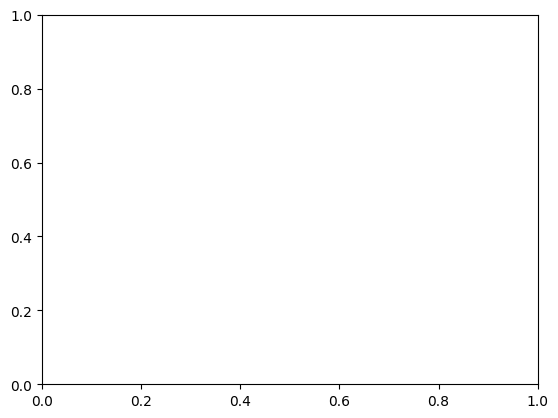

In [1]:
import pygame
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Inicializa o Pygame
pygame.init()

# Configurações da janela
LARGURA, ALTURA = 1000, 400
tela = pygame.display.set_mode((LARGURA, ALTURA))
pygame.display.set_caption("Simulação de Colisão")

# Cores
BRANCO = (255, 255, 255)
VERMELHO = (255, 0, 0)
AZUL = (0, 0, 255)
PRETO = (0, 0, 0)

# Propriedades dos objetos (posições em pixels)
RAIO1, RAIO2 = 20, 40
LADO1, LADO2 = RAIO1*2, RAIO2*2

ESCALA = 5  # fator para transformar metros em pixels

# BASE FÍSICA

# Definindo constantes
m1, m2 = 10, 100  # massas em kg
v01, v02 = 0, -10  # velocidades iniciais em m/s
x01, x02 = 10, 30  # posições iniciais em metros
x_parede = -75 # posição da parede em metros
tempo_simulacao = 20  # segundos

# Função para velocidades após colisão elástica unidimensional
def velocidades_depois_colisao(massa_corpo1, massa_corpo2, velocidade_corpo1, velocidade_corpo2):
    """
    Essa função utiliza a equação de colisão elástica unidimensional entre dois corpos para calcular a velocidade de cada corpo após a colisão.

    Argumentos:
    massa_corpo1: massa do corpo 1
    massa_corpo2: massa do corpo 2 
    velcocidade_corpo1: velocidade do corpo 1 antes da colisão
    velocidade_corpo2: velocidade do corpo 2 antes da colisão

    Retornos:
    v1: velocidade do corpo 1 após a colisão 
    v2: velocidade do corpo 2 após a colisão
    """
    v1 = ((massa_corpo1 - massa_corpo2) * velocidade_corpo1 + 2 * massa_corpo2 * velocidade_corpo2) / (massa_corpo1 + massa_corpo2)
    v2 = ((massa_corpo2 - massa_corpo1) * velocidade_corpo2 + 2 * massa_corpo1 * velocidade_corpo1) / (massa_corpo1 + massa_corpo2)
    
    return v1, v2

# Função posição
def pos(x0, v0, t):
    """
    Essa função utiliza a equação horária da posição para calcular a posição de um corpo a velocidade constante

    Argumentos:
    x0: posição inicial
    v0: velocidade inicial
    t: tempo de movimento

    Retorno:
    Posição do corpo no tempo t 
    """
    return x0 + v0 * t

# Colisão elástica com a parede
def colisao_com_parede(v0):
    """Essa função retorna a velocidade de um corpo que colide com uma parede imóvel de forma elástica"""
    return -v0

# Análise dos dados (Precisa ser atualizada para a simulação completa)
"""
print(f"Tempo de colisão: {tempo_colisao:.2f}s")
print(f"Posição da colisão: {pos_colisao:.2f}m")
print(f"Velocidades após colisão: v1 = {v1:.2f} m/s, v2 = {v2:.2f} m/s")
"""

#Variáveis para a simulação
t = np.linspace(0, tempo_simulacao, 60 * tempo_simulacao) # Lista de tempos para simulação (60 fps)
x1, x2 = [], [] # Listas de posições ao longo da simulação
x1_simulado, x2_simulado = x01, x02 # Posições temporárias durante a simulação
v1_simulado, v2_simulado = v01, v02 # Velocidades temporárias durante a simulação
passo_de_tempo = 1 / 60 # Variação de tempo entre cada instante simulado 

# Loop de simulação
relogio = pygame.time.Clock()
executando = True

while executando:
    tela.fill(PRETO)

    # Eventos do sistema (fechar janela)
    for evento in pygame.event.get():
        if evento.type == pygame.QUIT:
            executando = False

    #Atualiza a posição
    x1_simulado = pos(x1_simulado, v1_simulado, passo_de_tempo)
    x2_simulado = pos(x2_simulado, v2_simulado, passo_de_tempo)

    #Checa a colisão entre os blocos
    if x1_simulado >= x2_simulado:
        v1_simulado, v2_simulado = velocidades_depois_colisao(m1, m2, v1_simulado, v2_simulado)
        x1_simulado = x2_simulado

    #Checa a colisão com a parede
    if x1_simulado <= x_parede:
        v1_simulado = colisao_com_parede(v1_simulado)
        x1_simulado = x_parede

    #Atualiza a lista de posições
    x1.append(x1_simulado)
    x2.append(x2_simulado)

    # Conversão de posições físicas para pixels
    x1_s = int(x1_simulado * ESCALA + LARGURA // 2)
    x2_s = int(x2_simulado * ESCALA + LARGURA // 2)
    y = ALTURA // 2

    # Desenha os blocos
    pygame.draw.rect(tela, VERMELHO, (x1_s, y, LADO1, LADO1))
    pygame.draw.rect(tela, AZUL, (x2_s, y, LADO2, LADO2))

    # Desenha a parede
    x_parede_s = int(x_parede * ESCALA + LARGURA // 2)
    pygame.draw.line(tela, BRANCO, (x_parede_s, 0), (x_parede_s, ALTURA), 4)
    pygame.draw.line(tela, BRANCO, (0, y), (LARGURA, y), 4)

    pygame.display.flip()  # Atualiza a tela
    relogio.tick(60)  # Limita a 60 FPS

pygame.quit()

# Gráfico de trajetórias 
plt.figure()
plt.plot(t, x1, label='Corpo 1 (vermelho)')
plt.plot(t, x2, label='Corpo 2 (azul)')
plt.xlabel('Tempo (s)')
plt.ylabel('Posição (m)')
plt.title('Trajetórias dos corpos')
plt.grid(True)
plt.legend()
plt.show()

